<a href="https://colab.research.google.com/github/helenatong/oc_p7_score_bancaire/blob/main/p7_3_train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gérer le code avec le logiciel de version Git
# Partager le code sur Github pour assurer une intégration continue
# Utiliser Github Actions pour le déploiement continu et automatisé du code de l’API sur le cloud
# Concevoir des tests unitaires avec Pytest (ou Unittest) et les exécuter de manière automatisée lors du build réalisé par Github Actions


# Vous créerez un score “métier” (minimisation du coût d’erreur de prédiction des FN et FP) pour comparer les modèles,
# afin de choisir le meilleur modèle et ses meilleurs hyperparamètres. Attention cette minimisation du coût métier doit passer par l’optimisation du seuil qui détermine, à partir d’une probabilité, la classe 0 ou 1 (un “predict” suppose un seuil à 0.5 qui n’est pas forcément l’optimum)

# AUC > 0.82
#**kwargs : additional arguments ???
    ## AUC
    # y_pred_proba_train = pl.predict_proba(X_train)[:, 1]
    # y_pred_proba_test = pl.predict_proba(X_test)[:, 1]
    # best_threshold_train = find_best_threshold(y_train, y_pred_proba_train)[0]
    # best_threshold_test = find_best_threshold(y_test, y_pred_proba_test)[0]
    # print("Best threshold train:", best_threshold_train)
    # train_auc_score = round(roc_auc_score(y_train, y_pred_proba_train), 2)
    # test_auc_score = round(roc_auc_score(y_test, y_pred_proba_test), 2)
    # print("AUC train score:", train_auc_score)
    # print("AUC test score:", test_auc_score, end='\n\n')




# NEXT STEPS
# - Data understanding avec lemon truc
# - créer une visu streamlit


# **Introduction**

---

## **Prérequis**
- Télécharger [le zip]() dans Google Drive

---

## **Contexte et description du notebook**
- La société "Prêt à dépenser" propose des crédits à la consommation et souhaite créer un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit. Ainsi, la société pourra décider si elle souhaite ou non accorder la demande de crédit.
- Ce notebook va aggréger les différentes tables disponibles et exporter en csv le resultat obtenu.
---



# **I. Installation et mise en place de l'environnement de travail**

In [1]:
!pip install mlflow
!pip install pyngrok
!pip install imblearn
!pip install lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.1/575.1 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=99940ddcf1c6fc55f5bcccb14405b30756ee1ba4b0a53e5df4a154950e81939c
  Stored in 

In [2]:
# Importation des librairies
import numpy as np
import pandas as pd
import sys, zipfile

import os, sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import datetime, time, gc
from contextlib import contextmanager
import warnings

from sklearn.metrics import roc_auc_score

In [3]:
# Informations sur l'environnement virtuel
print('Version des librairies :')
print('Python        : ' + sys.version)
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__)

now  = datetime.datetime.now().isoformat()
print('Run date      : ' + now)

Version des librairies :
Python        : 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
NumPy         : 1.26.4
Pandas        : 2.2.2
Matplotlib    : 3.8.0
Seaborn       : 0.13.2
Run date      : 2024-11-29T13:22:54.860463


In [4]:
# Connexion au drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Récupérer le fichier
df = pd.read_parquet('/content/drive/MyDrive/openclassrooms/project_list/project_7/data/aggregated_df_30_variables.pq')

print(df.shape)
df.head()

(307507, 31)


,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_MAX,BURO_DAYS_CREDIT_MEAN,CC_AMT_BALANCE_MEAN,CC_AMT_TOTAL_RECEIVABLE_MEAN,CC_AMT_RECIVABLE_MEAN,...,BURO_MONTHS_BALANCE_MIN_MIN,CC_CNT_DRAWINGS_POS_CURRENT_MAX,BURO_DAYS_CREDIT_UPDATE_MEAN,CC_AMT_BALANCE_MAX,CC_AMT_TOTAL_RECEIVABLE_MAX,CC_AMT_RECIVABLE_MAX,DAYS_EMPLOYED_PERC,CC_AMT_RECEIVABLE_PRINCIPAL_MAX,ACTIVE_MONTHS_BALANCE_SIZE_MEAN,REFUSED_DAYS_DECISION_MAX
0,1,0.139376,0.262949,0.083037,NaN,NaN,-874.00,NaN,NaN,NaN,...,-47.0,NaN,-499.875,NaN,NaN,NaN,0.067329,NaN,10.0,NaN
1,0,NaN,0.622246,0.311267,NaN,NaN,-1400.75,NaN,NaN,NaN,...,NaN,NaN,-816.000,NaN,NaN,NaN,0.070862,NaN,NaN,NaN
2,0,0.729567,0.555912,NaN,NaN,NaN,-867.00,NaN,NaN,NaN,...,NaN,NaN,-532.000,NaN,NaN,NaN,0.011814,NaN,NaN,NaN
3,0,NaN,0.650442,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.159905,0.0,NaN,-181.0
4,0,NaN,0.322738,NaN,NaN,NaN,-1149.00,NaN,NaN,NaN,...,NaN,NaN,-783.000,NaN,NaN,NaN,0.152418,NaN,NaN,NaN


# **II. Set up mlflow et contexte**

## **A. Création d'un score business**

L'accuracy est une métrique utile pour connaitre le taux de prédictions correctes (Vrai P, Vrai N, Faux P, Faux N).

Néanmoins, dans notre contexte, le fait de se tromper sur davantage de FP a des conséquences économiques beaucoup plus importante que de se tromper sur la prédiction de FN.

En effet, si le banquier accorde un prêt à une personne qui ne remboursera pas son prêt (FN - mauvais client prédit bon client : donc crédit accordé et perte en capital), cela aura un coût beaucoup plus important que de ne pas accorder un prêt à une personne qui aurait remboursé le prix (FP - bon client prédit mauvais : donc refus crédit et manque à gagner en marge).

Je vais supposer que le coût d'un FN est dix fois supérieur au coût d’un FP et je vais créer un score 'METIER', il sera utilisé comme fonction de coût à minimiser dans l'entrainement du modèle.

De plus, la prédiction d'un FN ou d'un FP est dépendant d'un seuil dont la valeur est 0,5 par défault. Or, en prenant une valeur différente, on peut minimiser le nombre de FN et donc limiter la perte économique. Et ce même si l'accuracy diminue.

En conclusion, pour l'entrainement des modèles, je vais chercher à minimiser le score business, en choisissant le seuil optimal (pour prédire la classe)et ainsi limiter le nombre de FN par rapport au FP, en me concentrant moins sur l'accuracy.



In [6]:
from sklearn.metrics import confusion_matrix, make_scorer
# Définir la fonction de coût 'métier'

def find_best_threshold(y_true, y_pred_proba, cost_fn=10, cost_fp=1):
    """
    Trouve le meilleur seuil en minimisant le coût business
    """
    thresholds = np.arange(0, 1.01, 0.01)
    costs = []
    for threshold in thresholds:
      y_pred = (y_pred_proba >= threshold).astype(int)
      tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
      cost = cost_fn * fn + cost_fp * fp
      costs.append(cost)
    best_threshold = thresholds[np.argmin(costs)]
    return best_threshold, min(costs)


#récupérer direct ici le thrashold ?
# Pour chaque modèle entrainé, le choix sera effectué en trouvant le threshold qui minimise la valeur cost
def custom_business_cost(y_true, y_pred_proba, cost_fn=10, cost_fp=1):
    """
    Fonction de score qui trouve le meilleur seuil et retourne le score business
    """
    # Trouver le meilleur seuil
    best_threshold, cost = find_best_threshold(y_true, y_pred_proba, cost_fn, cost_fp)
    return cost

# Créer le scorer avec needs_proba=True
custom_scorer = make_scorer(custom_business_cost, greater_is_better=False, needs_proba=True)
#Cela permet à scikit-learn de savoir qu'il doit appeler predict_proba sur le modèle pour obtenir les probabilités avant de passer ces valeurs à custom_business_cost.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


## **B. Intégration avec MLFlow**

Les données issues de MLflow (metadata et artifacts) pour chaque run son enregistré dans un dossier local ml_runs.

Cliquez [ici](https://mlflow.org/docs/latest/tracking.html#concepts) pour avoir plus d'informations.

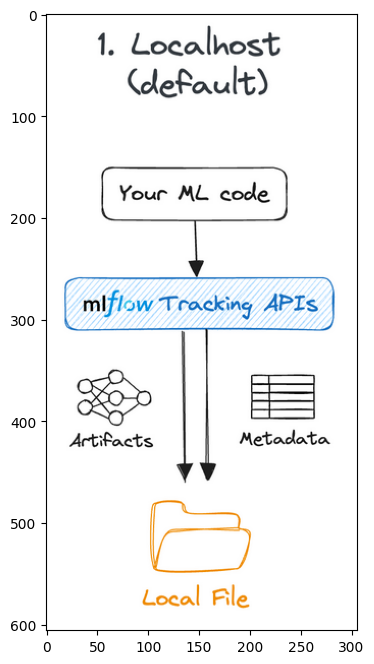

In [7]:
# Explication de l'architecture
from matplotlib import image

img = image.imread("/content/drive/MyDrive/openclassrooms/project_list/project_7/Images/mlflow_local_host_tracking.PNG")
plt.figure(figsize=(10, 8))
plt.imshow(img)

In [8]:
# Set up de mlflow

import mlflow
from pyngrok import ngrok
ngrok.set_auth_token("2ocCVNEZRsBzJn6vmweGP7zTw66_27wNNxnaRFzY8buEbUW6K")

# Créer un dossier local s'il n'existe pas pour stocker les logs MLflow
os.makedirs("mlruns", exist_ok=True)

# Configurer MLflow pour indiquer le lieu de stockage des différents experiments
local_server_uri = "file:./mlruns"
mlflow.set_tracking_uri(local_server_uri)

# Set up pour une avoir une interface utilisateur web mlflow
# Démarrer le serveur MLflow en arrière-plan
## get_ipython : autorise le notebook à run une commande shell
## system_raw: exécute la commande shellen argument
get_ipython().system_raw("mlflow ui --port 5000 &")

# Créer un tunnel pour le port 5000 et visualiser les trackings
public_url = ngrok.connect(5000)
print("MLflow Tracking UI:", public_url)

MLflow Tracking UI: NgrokTunnel: "https://4bd1-35-197-124-190.ngrok-free.app" -> "http://localhost:5000"


In [9]:
# # OPTIONAL - Clean

# from mlflow.tracking import MlflowClient

# # 1. Créer un client MLflow
# client = MlflowClient()

# # 2. Obtenir tous les experiments
# experiments = client.search_experiments()

# # 3. Pour chaque experiment
# for experiment in experiments:
#     # Obtenir tous les runs de l'experiment
#     runs = client.search_runs(experiment.experiment_id)

#     # Supprimer chaque run
#     for run in runs:
#         client.delete_run(run.info.run_id)

#     # Optionnel: Supprimer aussi l'experiment
#     client.delete_experiment(experiment.experiment_id)

# # Supprimer le contenur du fichier
# get_ipython().system_raw("rm -rf mlruns/.trash/*")

# print("Tous les runs et experiments ont été supprimés!")

# **III. Entrainement du modèle naïf**

Je vais commencer par entrainer un modèle naïf (LogisticRegression), sans équilibre de classe, sans grid search en optimisant le score d'accuracy.

Ce sera mon modèle de référence pour l'entrainement du modèle principal.

On va créer 2 modèles de référence:
- Un modèle sans équilibre de classe
- Un modèle avec équilibre de classe (SMOTE)

In [10]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import mlflow
import imblearn, sklearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn import set_config
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from joblib import dump
from mlflow.models import infer_signature

# Charger les données
y = df['TARGET']
X = df.drop(columns = ['TARGET'])

## **A. Sans équilibre de classe**

In [11]:
# Préparation des pipelines et modèle

# Construction de la pipeline de preprocessing
preprocessing_pipeline = sklearn.pipeline.Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler())
])

# Construction de la pipeline principale
main_pl = sklearn.pipeline.Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('model', LogisticRegression())
])

main_pl

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('model', LogisticRegression())])

In [12]:
# Créer un expériment et commencer le run #QUe se passe t il si on recréer un mm expériment
mlflow.set_experiment("MLflow Naive model runs")

## RUN 1
with mlflow.start_run(run_name='Naive_model_no_modification'):
    # Entrainement du modèle
    ## Diviser les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    ## Paramètres du modèle
    param_grid = {
        "preprocessor__imputer__strategy": ["median"],
        "model__C": [0.10, 0.01, 0.001],
        "model__random_state": [42],
    }
    pl = GridSearchCV(main_pl, param_grid=param_grid , cv=3, scoring=custom_scorer, n_jobs=-1, verbose=1)
    pl.fit(X_train, y_train)
    best_model = pl.best_estimator_
    print("Best model:", best_model, end='\n\n')
    print(set_config(display="diagram"))
    best_params = pl.best_params_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Évaluation du modèle
    ## ACCURACY
    train_accuracy_score = round(accuracy_score(y_train, y_pred_train), 2)
    test_accuracy_score = round(accuracy_score(y_test, y_pred_test), 2)
    print("train score accuracy:", train_accuracy_score)
    print("test score accuracy:", test_accuracy_score, end='\n\n')
    ## AUC
    y_pred_proba_train = pl.predict_proba(X_train)[:, 1]
    y_pred_proba_test = pl.predict_proba(X_test)[:, 1]
    train_auc_score = round(roc_auc_score(y_train, y_pred_proba_train), 2)
    test_auc_score = round(roc_auc_score(y_test, y_pred_proba_test), 2)
    print("AUC train score:", train_auc_score)
    print("AUC test score:", test_auc_score, end='\n\n')
    ## SCORE BUSINESS
    train_business_score = custom_business_cost(y_train, y_pred_train)
    test_business_score = custom_business_cost(y_test, y_pred_test)
    print("Business train score:", train_business_score)
    print("Business test score:", test_business_score)
    ### Pour comparer le train/test en s'affranchissant de la taille du jeu de données
    train_business_score_per_person = round(train_business_score/X_train.shape[0], 2)
    test_business_score_per_person = round(test_business_score/X_test.shape[0], 2)
    print("Business train score per person:", train_business_score_per_person)
    print("Business test score per person:", test_business_score_per_person)
    ## Récupérer le meilleur threshold pour le log dans le modèle
    best_threshold_train = find_best_threshold(y_train, y_pred_proba_train)[0]
    best_threshold_test = find_best_threshold(y_test, y_pred_proba_test)[0]
    print("Best threshold train:", best_threshold_train)
    print("Best threshold test:", best_threshold_test)
    ## Obtenir la matrice de confusion pour plus de détails
    train_tn, train_fp, train_fn, train_tp = confusion_matrix(y_train, y_pred_train).ravel()
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, y_pred_test).ravel()
    print(f"Nombre de faux négatif train {train_fn} pour {X_train.shape[0]} individus, soit {round(train_fp/X_train.shape[0]*100, 2)}%")
    print(f"Nombre de faux négatif test {test_fn} pour {X_test.shape[0]} individus, soit {round(test_fp/X_test.shape[0]*100, 2)}%")

    # Log les hyperparametres
    mlflow.log_params(best_params)
    # Faut il log les le grid ?

    # Log les métrics
    mlflow.log_metric("train_accuracy_score", train_accuracy_score)
    mlflow.log_metric("test_accuracy_score", test_accuracy_score)
    mlflow.log_metric("train_auc_score", train_auc_score)
    mlflow.log_metric("test_auc_score", test_auc_score)
    mlflow.log_metric("train_business_score", train_business_score)
    mlflow.log_metric("test_business_score", test_business_score)
    mlflow.log_metric("train_business_score_per_person", train_business_score_per_person)
    mlflow.log_metric("test_business_score_per_person", test_business_score_per_person)
    mlflow.log_metric("train_best_threshold", best_threshold_train)
    mlflow.log_metric("test_best_threshold", best_threshold_test)
    mlflow.log_metrics({
        "train_faux_neg": train_fn,
        "train_faux_pos": train_fp,
        "train_vrai_neg": train_tn,
        "train_vrai_pos": train_tp
    })
    mlflow.log_metrics({
        "test_faux_neg": test_fn,
        "test_faux_pos": test_fp,
        "test_vrai_neg": test_tn,
        "test_vrai_pos": test_tp
    })

    # Set le tag
    mlflow.set_tag("Training Info", "Naive_model_no_modification")

    # Créer la signature du modèle
    signature = infer_signature(X_train, pl.predict(X_train))

    # Log le modèle
    model_info = mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="Naive_model_no_modification",
        signature=signature,
        input_example=X_train,
        registered_model_name="Naive_model_no_modification",
    )

2024/11/29 13:23:32 INFO mlflow.tracking.fluent: Experiment with name 'MLflow Naive model runs' does not exist. Creating a new experiment.


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best model: Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', MinMaxScaler())])),
                ('model', LogisticRegression(C=0.1, random_state=42))])

None
train score accuracy: 0.92
test score accuracy: 0.92

AUC train score: 0.73
AUC test score: 0.73

Business train score: 197194
Business test score: 49288
Business train score per person: 0.8
Business test score per person: 0.8
Best threshold train: 0.08
Best threshold test: 0.09
Nombre de faux négatif train 19702 pour 246005 individus, soit 0.07%
Nombre de faux négatif test 4924 pour 61502 individus, soit 0.08%


/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'Naive_model_no_modification'.
Created version '1' of model 'Naive_model_no_modification'.


In [13]:
# Sauvegarder le modèle
dump(best_model, 'Naive_model_no_modification.joblib')

['Naive_model_no_modification.joblib']

## **B. Avec équilibre de classe (oversampling SMOTE)**

In [14]:
# Construction de la pipeline principale
## imblearn.pipeline.Pipeline n'accepte pas d'objet PL dans la PL
main_pl = imblearn.pipeline.Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler()),
    ('over_sampling', SMOTE()),
    ('model', LogisticRegression())
])

main_pl

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('over_sampling', SMOTE()), ('model', LogisticRegression())])

In [15]:
## RUN 2
with mlflow.start_run(run_name='Naive_model_SMOTE_class_balance'):
    # Entrainement du modèle
    ## Diviser les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    ## Paramètres du modèle
    param_grid = {
        "imputer__strategy": ['median'],
        "over_sampling__sampling_strategy": ['minority', 'all', 'not minority', 'auto'], #auto = not minority
        "over_sampling__k_neighbors": [4, 5, 6],
        "over_sampling__random_state": [42],
        "model__C": [0.10, 0.01],
        "model__random_state": [42]
    }
    pl = GridSearchCV(main_pl, param_grid=param_grid , cv=3, scoring=custom_scorer, n_jobs=-1, verbose=1)
    pl.fit(X_train, y_train)
    best_model = pl.best_estimator_
    print("Best model:", best_model, end='\n\n')
    print(set_config(display="diagram"))
    best_params = pl.best_params_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Évaluation du modèle
    ## ACCURACY
    train_accuracy_score = round(accuracy_score(y_train, y_pred_train), 2)
    test_accuracy_score = round(accuracy_score(y_test, y_pred_test), 2)
    print("train score accuracy:", train_accuracy_score)
    print("test score accuracy:", test_accuracy_score, end='\n\n')
    ## AUC
    y_pred_proba_train = pl.predict_proba(X_train)[:, 1]
    y_pred_proba_test = pl.predict_proba(X_test)[:, 1]
    train_auc_score = round(roc_auc_score(y_train, y_pred_proba_train), 2)
    test_auc_score = round(roc_auc_score(y_test, y_pred_proba_test), 2)
    print("AUC train score:", train_auc_score)
    print("AUC test score:", test_auc_score, end='\n\n')
    ## SCORE BUSINESS
    train_business_score = custom_business_cost(y_train, y_pred_train)
    test_business_score = custom_business_cost(y_test, y_pred_test)
    print("Business train score total:", train_business_score)
    print("Business test score total:", test_business_score)
    ### Pour comparer le train/test en s'affranchissant de la taille du jeu de données
    train_business_score_per_person = round(train_business_score/X_train.shape[0], 2)
    test_business_score_per_person = round(test_business_score/X_test.shape[0], 2)
    print("Business train score per person:", train_business_score_per_person)
    print("Business test score per person:", test_business_score_per_person)
    ## Récupérer le meilleur threshold pour le log dans le modèle
    best_threshold_train = find_best_threshold(y_train, y_pred_proba_train)[0]
    best_threshold_test = find_best_threshold(y_test, y_pred_proba_test)[0]
    print("Best threshold train:", best_threshold_train)
    print("Best threshold test:", best_threshold_test)
    ## Obtenir la matrice de confusion pour plus de détails
    train_tn, train_fp, train_fn, train_tp = confusion_matrix(y_train, y_pred_train).ravel()
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, y_pred_test).ravel()
    print(f"Nombre de faux négatif train {train_fn} pour {X_train.shape[0]} individus, soit {round(100*train_fp/X_train.shape[0], 2)}%")
    print(f"Nombre de faux négatif test {test_fn} pour {X_test.shape[0]} individus, soit {round(100*test_fp/X_test.shape[0], 2)}%")

    # Log les hyperparametres
    mlflow.log_params(best_params)
    # Faut il log les le grid ?

    # Log les métrics
    mlflow.log_metric("train_accuracy_score", train_accuracy_score)
    mlflow.log_metric("test_accuracy_score", test_accuracy_score)
    mlflow.log_metric("train_auc_score", train_auc_score)
    mlflow.log_metric("test_auc_score", test_auc_score)
    mlflow.log_metric("train_business_score", train_business_score)
    mlflow.log_metric("test_business_score", test_business_score)
    mlflow.log_metric("train_business_score_per_person", train_business_score_per_person)
    mlflow.log_metric("test_business_score_per_person", test_business_score_per_person)
    mlflow.log_metric("train_best_threshold", best_threshold_train)
    mlflow.log_metric("test_best_threshold", best_threshold_test)
    mlflow.log_metrics({
        "train_faux_neg": train_fn,
        "train_faux_pos": train_fp,
        "train_vrai_neg": train_tn,
        "train_vrai_pos": train_tp
    })
    mlflow.log_metrics({
        "test_faux_neg": test_fn,
        "test_faux_pos": test_fp,
        "test_vrai_neg": test_tn,
        "test_vrai_pos": test_tp
    })

    # Set le tag
    mlflow.set_tag("Training Info", "Naive_model_SMOTE_class_balance")

    # Créer la signature du modèle
    signature = infer_signature(X_train, pl.predict(X_train))

    # Log le modèle
    model_info = mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="Naive_model_SMOTE_class_balance",
        signature=signature,
        input_example=X_train,
        registered_model_name="Naive_model_SMOTE_class_balance",
    )

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best model: Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler()),
                ('over_sampling',
                 SMOTE(k_neighbors=4, random_state=42,
                       sampling_strategy='minority')),
                ('model', LogisticRegression(C=0.1, random_state=42))])

None
train score accuracy: 0.68
test score accuracy: 0.69

AUC train score: 0.73
AUC test score: 0.73

Business train score total: 139791
Business test score total: 34781
Business train score per person: 0.57
Business test score per person: 0.57
Best threshold train: 0.51
Best threshold test: 0.52
Nombre de faux négatif train 6894 pour 246005 individus, soit 28.8%
Nombre de faux négatif test 1722 pour 61502 individus, soit 28.55%


/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'Naive_model_SMOTE_class_balance'.
Created version '1' of model 'Naive_model_SMOTE_class_balance'.


In [16]:
# Sauvegarder le modèle
dump(best_model, 'Naive_model_SMOTE_class_balance.joblib')

['Naive_model_SMOTE_class_balance.joblib']

Conclusion:
Le modèle sans équilibre de classe est plus performant.
Pour le test, il y a 0.08% de FN sans équilibre de classe contre 28% de FN avec équilibre de classe.

# **IV. Entrainement du modèle LightGBM**

In [ ]:
# Construction de la pipeline principale
## imblearn.pipeline.Pipeline n'accepte pas d'objet PL dans la PL
from lightgbm import LGBMClassifier

main_pl = imblearn.pipeline.Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    # ('class_imbalance', SMOTE()),
    ('model', LGBMClassifier())
])

main_pl

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler()), ('model', LGBMClassifier())])

In [ ]:
## RUN 3
with mlflow.start_run(run_name='lightgbm_model'):
    # Entrainement du modèle
    ## Diviser les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    ## Paramètres du modèle
    param_grid = {
        "imputer__strategy": ['median'],
        "model__n_estimators": [1000], #10000
        "model__learning_rate": [0.01], #0.1, 0.001
        "model__max_depth": [8, 9, 10],
        "model__num_leaves": [30, 40, 50], # num_leaves <= 2^max_depth
        "model__is_unbalance": ['True', 'False'],
        "model__random_state": [42]
    }
    pl = GridSearchCV(main_pl, param_grid=param_grid , cv=3, scoring=custom_scorer, n_jobs=-1, verbose=1)
    pl.fit(X_train, y_train)
    best_model = pl.best_estimator_
    print("Best model:", best_model, end='\n\n')
    print(set_config(display="diagram"))
    best_params = pl.best_params_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Évaluation du modèle
    ## ACCURACY
    train_accuracy_score = round(accuracy_score(y_train, y_pred_train), 2)
    test_accuracy_score = round(accuracy_score(y_test, y_pred_test), 2)
    print("train score accuracy:", train_accuracy_score)
    print("test score accuracy:", test_accuracy_score, end='\n\n')
    ## AUC
    y_pred_proba_train = pl.predict_proba(X_train)[:, 1]
    y_pred_proba_test = pl.predict_proba(X_test)[:, 1]
    train_auc_score = round(roc_auc_score(y_train, y_pred_proba_train), 2)
    test_auc_score = round(roc_auc_score(y_test, y_pred_proba_test), 2)
    print("AUC train score:", train_auc_score)
    print("AUC test score:", test_auc_score, end='\n\n')
    ## SCORE BUSINESS
    train_business_score = custom_business_cost(y_train, y_pred_train)
    test_business_score = custom_business_cost(y_test, y_pred_test)
    print("Business train score:", train_business_score)
    print("Business test score:", test_business_score)
    ### Pour comparer le train/test en s'affranchissant de la taille du jeu de données
    train_business_score_per_person = round(train_business_score/X_train.shape[0], 2)
    test_business_score_per_person = round(test_business_score/X_test.shape[0], 2)
    print("Business train score per person:", train_business_score_per_person)
    print("Business test score per person:", test_business_score_per_person)
    ## Récupérer le meilleur threshold pour le log dans le modèle
    best_threshold_train = find_best_threshold(y_train, y_pred_proba_train)[0]
    best_threshold_test = find_best_threshold(y_test, y_pred_proba_test)[0]
    print("Best threshold train:", best_threshold_train)
    print("Best threshold test:", best_threshold_test)
    ## Obtenir la matrice de confusion pour plus de détails
    train_tn, train_fp, train_fn, train_tp = confusion_matrix(y_train, y_pred_train).ravel()
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, y_pred_test).ravel()
    print(f"Nombre de faux négatif train {train_fn} pour {X_train.shape[0]} individus, soit {round(train_fp/X_train.shape[0]*100, 2)}%")
    print(f"Nombre de faux négatif test {test_fn} pour {X_test.shape[0]} individus, soit {round(test_fp/X_test.shape[0]*100, 2)}%")

    # Log les hyperparametres
    mlflow.log_params(best_params)
    # Faut il log les le grid ?

    # Log les métrics
    mlflow.log_metric("train_accuracy_score", train_accuracy_score)
    mlflow.log_metric("test_accuracy_score", test_accuracy_score)
    mlflow.log_metric("train_auc_score", train_auc_score)
    mlflow.log_metric("test_auc_score", test_auc_score)
    mlflow.log_metric("train_business_score", train_business_score)
    mlflow.log_metric("test_business_score", test_business_score)
    mlflow.log_metric("train_business_score_per_person", train_business_score_per_person)
    mlflow.log_metric("test_business_score_per_person", test_business_score_per_person)
    mlflow.log_metric("train_best_threshold", best_threshold_train)
    mlflow.log_metric("test_best_threshold", best_threshold_test)
    mlflow.log_metrics({
        "train_faux_neg": train_fn,
        "train_faux_pos": train_fp,
        "train_vrai_neg": train_tn,
        "train_vrai_pos": train_tp
    })
    mlflow.log_metrics({
        "test_faux_neg": test_fn,
        "test_faux_pos": test_fp,
        "test_vrai_neg": test_tn,
        "test_vrai_pos": test_tp
    })

    # Set le tag
    mlflow.set_tag("Training Info", "lightgbm_model")

    # Créer la signature du modèle
    signature = infer_signature(X_train, pl.predict(X_train))

    # Log le modèle
    model_info = mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="lightgbm_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="lightgbm_model",
    )

Fitting 3 folds for each of 72 candidates, totalling 216 fits


KeyboardInterrupt: 

# **V. Explication du modèle**

In [29]:
import lime
from lime.lime_tabular import LimeTabularExplainer
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

def get_lime_explainer(model, data, y):
  cat_feat_ix = [i for i,c in enumerate(data.columns) if pd.api.types.is_categorical_dtype(data[c])]
  feat_names = list(data.columns)
  class_names = list(y.unique())
  imputer = model.named_steps['imputer']
  imputed_data = imputer.transform(data)
  scaler = model.named_steps['scaler']
  data = scaler.transform(imputed_data) # scale data to reflect train time scaling
  lime_explainer = LimeTabularExplainer(data,
                                      feature_names=feat_names,
                                      class_names=class_names,
                                      categorical_features=cat_feat_ix ,
                                      mode="classification"
                                      )
  return lime_explainer

def lime_explain(explainer, data, predict_method, num_features):
  explanation = explainer.explain_instance(data, predict_method, num_features=num_features)
  return explanation

lime_data_explainations = []
lime_metrics = []
# lime_explanation_time = []
feat_names = list(X.columns)
test_data_index = 8
top_features = 30

# Utilisation de LIME pour expliquer les prédictions du meilleur modèle
imputer = best_model.named_steps['imputer']
X_imputer_test_data = imputer.transform(X_test)
scaler = best_model.named_steps['scaler']
scaled_test_data = scaler.transform(X_imputer_test_data)
predict_method = best_model.named_steps['model'].predict_proba

# Explain first sample from test data
start_time = time.time()
lime_explainer = get_lime_explainer(best_model, X_train, y_train)
explanation = lime_explain(lime_explainer, scaled_test_data[test_data_index], predict_method, top_features)
# elapsed_time = time.time() - start_time

ex_holder = {}
for feat_index, ex in explanation.as_map()[1]:
    ex_holder[feat_names[feat_index]] = ex
lime_data_explainations.append(ex_holder)
actual_pred = predict_method(scaled_test_data[test_data_index].reshape(1,-1))
perc_pred_diff =  abs(actual_pred[0][1] - explanation.local_pred[0])
# lime_explanation_time.append({"time": elapsed_time, "model": "best_model" })
lime_metrics.append({"lime class1": explanation.local_pred[0], "actual class1": actual_pred[0][1], "class_diff": round(perc_pred_diff,3), "model": "best_model" })

<ipython-input-29-543512de7e34>:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  cat_feat_ix = [i for i,c in enumerate(data.columns) if pd.api.types.is_categorical_dtype(data[c])]


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de DataFrame X
import pandas as pd
import numpy as np

# Supposons que X soit votre DataFrame
# Créer une liste de couleurs en utilisant une palette de couleurs de Seaborn
palette = sns.color_palette("husl", len(X.columns))
color_list = {col: palette[i] for i, col in enumerate(X.columns)}

# Vérification de la color_list
print(color_list)

{'EXT_SOURCE_3': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701), 'EXT_SOURCE_2': (0.9694979754285514, 0.4537284387051496, 0.40783466214891867), 'EXT_SOURCE_1': (0.9542900080364486, 0.4779505175890752, 0.1963917622115608), 'CC_CNT_DRAWINGS_ATM_CURRENT_MEAN': (0.8616090647292522, 0.536495730113334, 0.19548899031476086), 'CC_CNT_DRAWINGS_CURRENT_MAX': (0.7930046244373694, 0.5708100522446624, 0.19489531984381053), 'BURO_DAYS_CREDIT_MEAN': (0.7350228985632719, 0.5952719904750953, 0.1944419133847522), 'CC_AMT_BALANCE_MEAN': (0.6804189127793346, 0.6151497514677574, 0.19405452111445337), 'CC_AMT_TOTAL_RECEIVABLE_MEAN': (0.6234809659087222, 0.6330654918766613, 0.19369052933737949), 'CC_AMT_RECIVABLE_MEAN': (0.5571803870240879, 0.6507747739933957, 0.19331667588333168), 'CC_AMT_RECEIVABLE_PRINCIPAL_MEAN': (0.46810256823426116, 0.6699492535792404, 0.19289587399044988), 'CC_CNT_DRAWINGS_CURRENT_MEAN': (0.3126890019504329, 0.6928754610296064, 0.1923704830330379), 'BURO_MONTHS_BALANCE_

{'EXT_SOURCE_3': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701), 'EXT_SOURCE_2': (0.9694979754285514, 0.4537284387051496, 0.40783466214891867), 'EXT_SOURCE_1': (0.9542900080364486, 0.4779505175890752, 0.1963917622115608), 'CC_CNT_DRAWINGS_ATM_CURRENT_MEAN': (0.8616090647292522, 0.536495730113334, 0.19548899031476086), 'CC_CNT_DRAWINGS_CURRENT_MAX': (0.7930046244373694, 0.5708100522446624, 0.19489531984381053), 'BURO_DAYS_CREDIT_MEAN': (0.7350228985632719, 0.5952719904750953, 0.1944419133847522), 'CC_AMT_BALANCE_MEAN': (0.6804189127793346, 0.6151497514677574, 0.19405452111445337), 'CC_AMT_TOTAL_RECEIVABLE_MEAN': (0.6234809659087222, 0.6330654918766613, 0.19369052933737949), 'CC_AMT_RECIVABLE_MEAN': (0.5571803870240879, 0.6507747739933957, 0.19331667588333168), 'CC_AMT_RECEIVABLE_PRINCIPAL_MEAN': (0.46810256823426116, 0.6699492535792404, 0.19289587399044988), 'CC_CNT_DRAWINGS_CURRENT_MEAN': (0.3126890019504329, 0.6928754610296064, 0.1923704830330379), 'BURO_MONTHS_BALANCE_

<Figure size 1900x800 with 0 Axes>

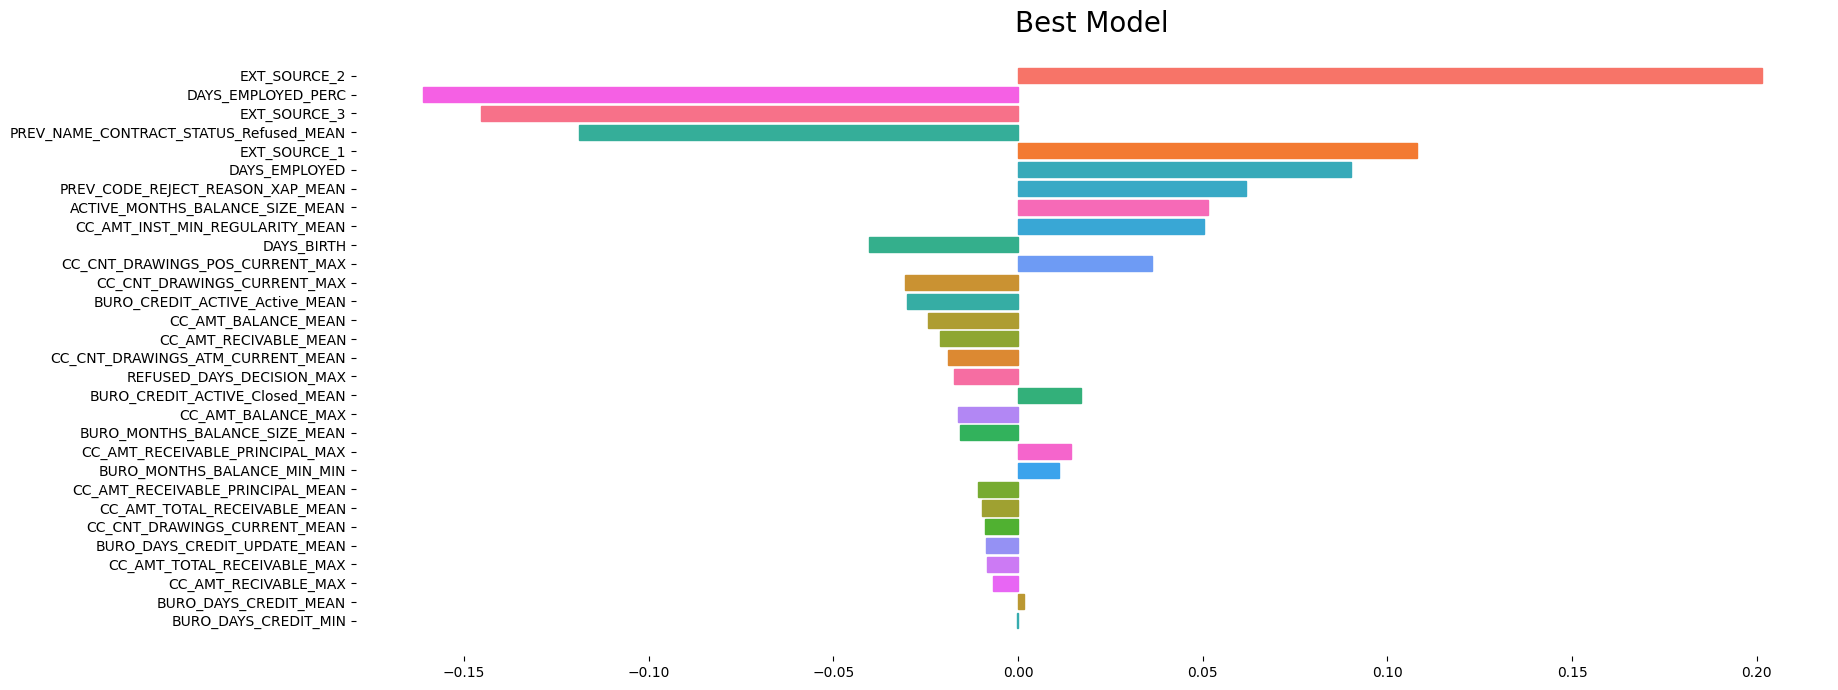

<Figure size 640x480 with 0 Axes>

In [31]:
def setup_plot():
  plt.rcParams["axes.grid.axis"] ="y"
  plt.rcParams["axes.grid"] = True
  plt.rcParams["legend.fontsize"] = 14
  plt.rc('grid', linestyle="dashed", color='lightgrey', linewidth=1)
  plt.rcParams["xtick.labelsize"] = 15
  plt.rcParams["ytick.labelsize"]  = 15

palette = sns.color_palette("husl", len(X.columns))
color_list = {col: palette[i] for i, col in enumerate(X.columns)}

# Vérification de la color_list
print(color_list)

# Fonction pour tracer les explications LIME
def plot_lime_exp(exp_data, title):
    features = list(exp_data.keys())[::-1]
    explanations = list(exp_data.values())[::-1]
    fig, ax = plt.subplots(figsize=(19, 8))
    lime_bar = ax.barh(features, explanations)
    ax.set_title(title, fontsize=20)
    for i, bar in enumerate(lime_bar):
        feature_name = features[i]
        if feature_name in color_list:
            bar.set_color(color_list[feature_name])
        else:
            bar.set_color('grey')  # Couleur par défaut si la fonctionnalité n'est pas trouvée
    plt.box(False)
    plt.show()
  # Création de la figure pour les explications LIME
fig = plt.figure(figsize=(19, 8))

# Tracer les explications LIME pour le meilleur modèle
fig_index = (1, 1, 1)
plot_lime_exp(lime_data_explainations[0], "Best Model")

plt.suptitle("LIME Explanation for single test data instance. Top " + str(top_features) + " Features", fontsize=20, fontweight="normal")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
# Sélectionner un échantillon représentatif
sample_indices = np.random.choice(X_test.index, size=5000, replace=False)
sample_data = X_test.loc[sample_indices]

# # Générer des explications locales et agréger les importances des features
# lime_explainer = get_lime_explainer(best_model, X_train, y_train)
feature_importances = pd.DataFrame()

for idx in sample_indices:
    explanation = lime_explain(lime_explainer, scaled_test_data[X_test.index.get_loc(idx)], predict_method, len(X.columns))
    ex_holder = {feat_names[feat_index]: ex for feat_index, ex in explanation.as_map()[1]}
    feature_importances = pd.concat([feature_importances, pd.DataFrame([ex_holder])], ignore_index=True)

# Calculer l'importance globale des features
global_feature_importance = feature_importances.mean().sort_values(ascending=False)

# Tracer les importances globales des features
def plot_global_feature_importance(global_feature_importance, title):
    features = global_feature_importance.index
    importances = global_feature_importance.values
    fig, ax = plt.subplots(figsize=(19, 8))
    lime_bar = ax.barh(features, importances)
    ax.set_title(title, fontsize=20)
    for i, bar in enumerate(lime_bar):
        feature_name = features[i]
        if feature_name in color_list:
            bar.set_color(color_list[feature_name])
        else:
            bar.set_color('grey')  # Couleur par défaut si la fonctionnalité n'est pas trouvée
    plt.box(False)
    plt.show()

# Tracer l'importance globale des features
plot_global_feature_importance(global_feature_importance, "Global Feature Importance using LIME")

# ancien

In [ ]:
# ## RUN 2
# with mlflow.start_run():
#     # Log les hyperparametres
#     mlflow.log_params(model_params)


#     # Entrainement du modèle
#     # Sous-échantillonnage de la classe majoritaire (0)
#     class_0_indices = np.where(y == 0)[0]
#     class_1_indices = np.where(y == 1)[0]

#     # Sélectionner aléatoirement autant d'instances de la classe 0 que de la classe 1
#     np.random.seed(42) #Pour la répétabilité
#     class_0_indices_subset = np.random.choice(class_0_indices, size=len(class_1_indices), replace=False)

#     # Créer le nouvel ensemble rééquilibré
#     X_resampled = pd.concat([X.iloc[class_0_indices_subset], X.iloc[class_1_indices]])
#     y_resampled = pd.concat([y.iloc[class_0_indices_subset], y.iloc[class_1_indices]])

#     # Vérification du résultat de sous-échantillonage
#     print(f"Nombre d'instances de la classe 0 : {sum(y_resampled == 0)}")
#     print(f"Nombre d'instances de la classe 1 : {sum(y_resampled == 1)}")

#     X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled)
#     pipeline.fit(X_train, y_train)
#     trained_model = pipeline.named_steps['model']

#     # Évaluation du modèle
#     ## ACCURACY
#     train_score = pipeline.score(X_train, y_train)
#     test_score = pipeline.score(X_test, y_test)
#     print("train score accuracy:", train_score)
#     print("test score accuracy:", test_score)
#     ## AUC
#     y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
#     auc_score = roc_auc_score(y_test, y_pred_proba)
#     print("AUC score:", auc_score)
#     ## SCORE BUSINESS
#     print("Business score:", business_cost(y_test, pipeline.predict(X_test)))


#     # Log les métrics
#     mlflow.log_metric("accuracy_test", train_score)
#     mlflow.log_metric("accuracy_test", test_score)
#     mlflow.log_metric("auc_score", auc_score)
#     mlflow.log_metric("business_score", auc_score)

#     # Set le tag
#     mlflow.set_tag("Training Info", "Naive_model_undersampling")

#     # Créer la signature du modèle
#     X_proprocessed = pipeline.named_steps['preprocessor'].transform(X_train)
#     X_train_preprocessed = pd.DataFrame(X_proprocessed, columns=X_train.columns)
#     signature = infer_signature(X_train_preprocessed, trained_model.predict(X_train_preprocessed))

#     # Log le modèle
#     model_info = mlflow.sklearn.log_model(
#         sk_model=trained_model,
#         artifact_path="Naive_model_undersampling",
#         signature=signature,
#         input_example=X_train_preprocessed,
#         registered_model_name="Naive_model_undersampling",
#     )

In [ ]:
# business_cost(y_test, pipeline.predict(X_test))
# y_test.shape[0]*2

Le score d'accuracy est très élevé et similaire entre le train et le test.

Cette observation peut être liée à un déséquilibre des classes.

In [ ]:
# # Vérifier la répartition des classes
# print(f"Nombre d'instances de la classe 0 : {sum(y == 0)}")
# print(f"Nombre d'instances de la classe 1 : {sum(y == 1)}")

## **Entrainement sans déséquilibre de classe**

Je vais faire un sous-échantillonage pour avoir autant de d'individus entre les catégorie 0 et 1 de la variable target.

In [ ]:
# #Tester 3 approches différentes
# # Faire une pipeline pour ca "ramdom oversampling" ?
# # Se renseigner sur SMOTE => undersampling
# # Se renseigner sur SMOTE => oversampling
# # ClassWeight dans le modèle {(im)balance}

# # Tester le modele elaboré direct LG

# # https://imbalanced-learn.org/stable/over_sampling.html

# # Sous-échantillonnage de la classe majoritaire (0)
# class_0_indices = np.where(y == 0)[0]
# class_1_indices = np.where(y == 1)[0]

# # Sélectionner aléatoirement autant d'instances de la classe 0 que de la classe 1
# np.random.seed(42) #Pour la répétabilité
# class_0_indices_subset = np.random.choice(class_0_indices, size=len(class_1_indices), replace=False)

# # Créer le nouvel ensemble rééquilibré
# X_resampled = pd.concat([X.iloc[class_0_indices_subset], X.iloc[class_1_indices]])
# y_resampled = pd.concat([y.iloc[class_0_indices_subset], y.iloc[class_1_indices]])

# # Vérification du résultat de sous-échantillonage
# print(f"Nombre d'instances de la classe 0 : {sum(y_resampled == 0)}")
# print(f"Nombre d'instances de la classe 1 : {sum(y_resampled == 1)}")

In [ ]:
# !pip uninstall imblearn -y  # Uninstall the library
# !pip install imblearn -U    # Reinstall with the latest version

# # !pip uninstall imblearn -y   # Uninstall the library
# # !pip install imblearn==0.12.4

In [ ]:
# # print('imblearn       : ' + imblearn.__version__)
# import imblearn, sklearn
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler
# from sklearn import set_config
# from imblearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression

# # Préparation des pipelines et modèle
# # Paramètres du modèle
# model_params = {
#     "C": 0.0001,
#     "random_state": 42,
# }

# # Construction de la pipeline principale
# pipeline = imblearn.pipeline.Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', MinMaxScaler()),
#     ('class_imbalance', SMOTE()),
#     ('model', LogisticRegression(**model_params))
# ])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
# # X_res, y_res = pipeline.fit(X_train, y_train)
# pl2 = pipeline.fit(X_train, y_train)
# set_config(display="diagram")
# pl2  # click on the diagram below to see the details of each step

# # pl2 = LogisticRegression(**model_params).fit(X_res, y_res)
# # Évaluation du modèle
# ## ACCURACY
# train_score = pl2.score(X_train, y_train)
# test_score = pl2.score(X_train, y_train)
# # train_score = pl2.score(X_res, y_res)
# # test_score = pl2.score(X_res, y_res)

# print("train score accuracy:", train_score)
# print("test score accuracy:", test_score)

# ## AUC
# y_pred_proba = pl2.predict_proba(X_train)[:, 1]
# auc_score = roc_auc_score(y_train, y_pred_proba)
# print("AUC score:", auc_score)

# # Score business
# print("Business score:", business_cost(y_train, pl2.predict(X_train)))
# #equilibrage vs class weight
# #grid search
# #ajout matrice de confusion

# #Voir pq déséquilibre de classe effet sur accuracy
# #Fct f beta score ? à la place du business score : si temps.

# #shap = good pour interprétation local et global
# #lime = good pour interprétation local #pour le dashboard! on choisit des individus

In [ ]:
# # Entrainement du modèle sans déséquilibre de classe
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled)
# pipeline.fit(X_train, y_train)

# # Évaluation du modèle
# ## ACCURACY
# train_score = pipeline.score(X_train, y_train)
# test_score = pipeline.score(X_test, y_test)
# trained_model = pipeline.named_steps['model']

# print("train score accuracy:", train_score)
# print("test score accuracy:", test_score)

# ## AUC
# y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
# auc_score = roc_auc_score(y_test, y_pred_proba)
# print("AUC score:", auc_score)

# # Score business
# print("Business score:", business_cost(y_test, pipeline.predict(X_test)))

In [ ]:
# X_proprocessed = pipeline.named_steps['preprocessor'].transform(X_train)
# X_train_preprocessed = pd.DataFrame(X_proprocessed, columns=X_train.columns)
# X_train_preprocessed

# X_proprocessed = pipeline.named_steps['preprocessor'].transform(X_test)
# X_test_preprocessed = pd.DataFrame(X_proprocessed, columns=X_test.columns)
# X_test_preprocessed

In [ ]:
# Load the model back for predictions as a generic Python Function model
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

predictions = loaded_model.predict(X_test_preprocessed)

feature_names = X_test_preprocessed.columns

result = pd.DataFrame(X_test_preprocessed, columns=feature_names)
result["actual_class"] = y_test
result["predicted_class"] = predictions

result[:10]

AVEC UN MODELE NAIF, SANS EQUILIBRE DE CLASSE, SANS GRID SEARCH, AVEC 30 variables features,






In [ ]:
# import mlflow
# from pyngrok import ngrok

# # Créer un dossier pour stocker les logs MLflow
# os.makedirs("mlruns", exist_ok=True)

# # Configurer MLflow pour utiliser le stockage local
# mlflow.set_tracking_uri("file:./mlruns")

# # Le reste de votre code reste identique
# mlflow.set_experiment("MLflow Quickstart")


# # Démarrer le serveur MLflow en arrière-plan
# get_ipython().system_raw("mlflow ui --port 5000 &")
# # Créer un tunnel pour le port 5000

# public_url = ngrok.connect(5000)
# print("MLflow Tracking UI:", public_url)

In [ ]:
# # Importer les bibliothèques nécessaires
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression

# df1 = df.loc[df['TARGET'].isin([0, 1])]
# # df2 = df1.sample(1000).copy().reset_index(drop=True)
# df2 = df1.copy().reset_index(drop=True)

# # Charger les données
# y = df2['TARGET']
# X = df2.drop(columns = ['TARGET'])

# # Vérifier la répartition des classes
# print(f"Nombre d'instances de la classe 0 : {sum(y == 0)}")
# print(f"Nombre d'instances de la classe 1 : {sum(y == 1)}")

# # Sous-échantillonnage de la classe majoritaire (0)
# class_0_indices = np.where(y == 0)[0]
# class_1_indices = np.where(y == 1)[0]

# # Sélectionner aléatoirement autant d'instances de la classe 0 que de la classe 1
# np.random.seed(42)
# class_0_indices_subset = np.random.choice(class_0_indices, size=len(class_1_indices), replace=False)

# # Créer le nouvel ensemble rééquilibré
# X_resampled = pd.concat([X.iloc[class_0_indices_subset], X.iloc[class_1_indices]])
# y_resampled = pd.concat([y.iloc[class_0_indices_subset], y.iloc[class_1_indices]])

# print(f"Nombre d'instances de la classe 0 : {sum(y_resampled == 0)}")
# print(f"Nombre d'instances de la classe 1 : {sum(y_resampled == 1)}")



# # Construction du pipeline
# preprocessing_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', MinMaxScaler())
# ])

# model_params = {
#     "C": 0.0001,
#     "random_state": 42,
# }

# # Pipeline complet
# pipeline = Pipeline([
#     ('preprocessor', preprocessing_pipeline),
#     ('model', LogisticRegression(**model_params))
# ])

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled)
# pipeline.fit(X_train, y_train)

# # Évaluation du modèle
# ## ACCURACY
# trained_model = pipeline.named_steps['model']
# train_score = pipeline.score(X_train, y_train)
# test_score = pipeline.score(X_test, y_test)

# print("train score accuracy:", train_score)
# print("test score accuracy:", test_score)

# # ## AUC
# # from sklearn.metrics import roc_auc_score, roc_curve
# # # Obtenir les probabilités prédites pour la classe positive (VRAI POSITIF et FAUX POSITIF)
# # y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
# # # Calculer l'AUC
# # auc_score = roc_auc_score(y_test, y_pred_proba)

# # # Calcul de la courbe ROC
# # fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# # # Création du graphique ROC
# # plt.figure(figsize=(8, 6))
# # plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.3f})')
# # plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# # plt.xlabel('Taux de faux positifs')
# # plt.ylabel('Taux de vrais positifs')
# # plt.title('Courbe ROC')
# # plt.legend()
# # plt.grid(True)

# # # Affichage des résultats
# # print("AUC score:", auc_score)

In [ ]:
# X_proprocessed = pipeline.named_steps['preprocessor'].transform(X_train)
# X_train_preprocessed = pd.DataFrame(X_proprocessed, columns=X_train.columns)
# X_train_preprocessed

# X_proprocessed = pipeline.named_steps['preprocessor'].transform(X_test)
# X_test_preprocessed = pd.DataFrame(X_proprocessed, columns=X_test.columns)
# X_test_preprocessed

In [ ]:
# from mlflow.models import infer_signature
# # Set our tracking server uri for logging
# mlflow.set_tracking_uri(uri='file:./mlruns')

# # Create a new MLflow Experiment
# mlflow.set_experiment("MLflow Quickstart")

# # Start an MLflow run
# with mlflow.start_run():
#     # Log the hyperparameters
#     mlflow.log_params(model_params)

#     # Log the loss metric
#     mlflow.log_metric("accuracy", test_score)

#     # Set a tag that we can use to remind ourselves what this run was for
#     mlflow.set_tag("Training Info", "Basic trained_model model for iris data")

#     # Infer the model signature
#     signature = infer_signature(X_train_preprocessed, trained_model.predict(X_train_preprocessed))

#     # Log the model
#     model_info = mlflow.sklearn.log_model(
#         sk_model=trained_model,
#         artifact_path="iris_model",
#         signature=signature,
#         input_example=X_train_preprocessed,
#         registered_model_name="tracking-quickstart",
#     )

In [ ]:
# # Load the model back for predictions as a generic Python Function model
# loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

# predictions = loaded_model.predict(X_test_preprocessed)

# iris_feature_names = X_test_preprocessed.columns

# result = pd.DataFrame(X_test_preprocessed, columns=iris_feature_names)
# result["actual_class"] = y_test
# result["predicted_class"] = predictions

# result[:10]

In [ ]:
# # Importer les bibliothèques nécessaires
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression

# df1 = df.loc[df['TARGET'].isin([0, 1])]
# # df2 = df1.sample(1000).copy().reset_index(drop=True)
# df2 = df1.copy().reset_index(drop=True)

# # Charger les données
# y = df2['TARGET']
# X = df2.drop(columns = ['TARGET'])

# # Construction du pipeline
# preprocessing_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', MinMaxScaler())
# ])

# LR_model = LogisticRegression(C=0.0001, random_state=42)

# # Pipeline complet
# pipeline = Pipeline([
#     ('preprocessor', preprocessing_pipeline),
#     ('model', LR_model)
# ])

# # Diviser les données en ensemble d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
# pipeline.fit(X_train, y_train)

# # Évaluation du modèle
# train_score = pipeline.score(X_train, y_train)
# test_score = pipeline.score(X_test, y_test)

# # print("params:" , log_reg.get_params())
# print("train score accuracy:", train_score)
# print("test score accuracy:", test_score)

In [ ]:
# # Vérifier la répartition des classes
# print(f"Nombre d'instances de la classe 0 : {sum(y == 0)}")
# print(f"Nombre d'instances de la classe 1 : {sum(y == 1)}")

# # Sous-échantillonnage de la classe majoritaire (0)
# class_0_indices = np.where(y == 0)[0]
# class_1_indices = np.where(y == 1)[0]

# # Sélectionner aléatoirement autant d'instances de la classe 0 que de la classe 1
# np.random.seed(42)
# class_0_indices_subset = np.random.choice(class_0_indices, size=len(class_1_indices), replace=False)

# # Créer le nouvel ensemble rééquilibré
# X_resampled = pd.concat([X.iloc[class_0_indices_subset], X.iloc[class_1_indices]])
# y_resampled = pd.concat([y.iloc[class_0_indices_subset], y.iloc[class_1_indices]])

# print(f"Nombre d'instances de la classe 0 : {sum(y_resampled == 0)}")
# print(f"Nombre d'instances de la classe 1 : {sum(y_resampled == 1)}")

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled)
# pipeline.fit(X_train, y_train)

# # Évaluation du modèle
# ## ACCURACY
# train_score = pipeline.score(X_train, y_train)
# test_score = pipeline.score(X_test, y_test)

# print("train score accuracy:", train_score)
# print("test score accuracy:", test_score)

# ## AUC
# from sklearn.metrics import roc_auc_score, roc_curve
# # Obtenir les probabilités prédites pour la classe positive (VRAI POSITIF et FAUX POSITIF)
# y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
# # Calculer l'AUC
# auc_score = roc_auc_score(y_test, y_pred_proba)

# # Calcul de la courbe ROC
# fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# # Création du graphique ROC
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.3f})')
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.xlabel('Taux de faux positifs')
# plt.ylabel('Taux de vrais positifs')
# plt.title('Courbe ROC')
# plt.legend()
# plt.grid(True)

# # Affichage des résultats
# print("AUC score:", auc_score)

AVEC EQUILIBRE DES CLASSES

**TRAITEMENT DU DESEQUILIBRE BON/MAUVAIS CLIENTS**
Méthode utilisée: sous-échantillonage

In [ ]:
df.TARGET.value_counts()

In [ ]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# df1 = df.loc[df['TARGET'].isin([0, 1])]
# df2 = df1.sample(1000).copy().reset_index(drop=True)
# df2 = df1.copy().reset_index(drop=True)
df = df.loc[df['TARGET'].isin([0, 1])]


# Charger les données
y = df['TARGET']
X = df.drop(columns = ['TARGET'])

# Imputation des valeurs Nan Et faire un scaler
imputer = SimpleImputer(strategy = 'median')
scaler = MinMaxScaler(feature_range = (0, 1))
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X_imputed= imputer.fit_transform(X)
X_scaled= scaler.fit_transform(X_imputed)

# Vérifier la répartition des classes
print(f"Nombre d'instances de la classe 0 : {sum(y == 0)}")
print(f"Nombre d'instances de la classe 1 : {sum(y == 1)}")

# Sous-échantillonnage de la classe majoritaire (0)
class_0_indices = np.where(y == 0)[0]
class_1_indices = np.where(y == 1)[0]

# Sélectionner aléatoirement 25 000 instances de la classe 0
np.random.seed(42)
class_0_indices_subset = np.random.choice(class_0_indices, size=sum(y == 1), replace=False)

# Créer le nouvel ensemble rééquilibré
X_resampled = np.concatenate([X_scaled[class_0_indices_subset], X_scaled[class_1_indices]])
y_resampled = np.concatenate([y[class_0_indices_subset], y[class_1_indices]])

**CREATION D'UN PARAMETRE 'METIER' A MINIMISER**

Il existe un déséquilibre du coût métier entre un faux négatif (FN - mauvais client prédit bon client : donc crédit accordé et perte en capital) et un faux positif (FP - bon client prédit mauvais : donc refus crédit et manque à gagner en marge).

Autrement dit, il y a une différence entre le coût d'un FN et le coût d'un FP.

Je vais supposer que le coût d'un FN est dix fois supérieur au coût d’un FP et je vais créer un score 'METIER', il sera utilisé comme fonction de coût à minimser dans l'entrainement du modèle.

Les scores de l’AUC et l’accuracy vont également être analysés pour vérifier la cohérence des résultats.

In [ ]:
from sklearn.metrics import confusion_matrix
# Définir la fonction de coût 'métier'
FN_COST = 10
FP_COST = 1

def business_cost(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return FN_COST * fn + FP_COST * fp

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer, confusion_matrix

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled) #Conserver les proportions

# Définir les hyperparamètres à optimiser
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Créer le score business
business_cost_error = make_scorer(business_cost, greater_is_better=False) #on veut minimiser

# Effectuer la recherche par grille
grid_search = GridSearchCV(RandomForestClassifier(random_state=50), param_grid, cv=5, scoring=business_cost_error, n_jobs=-1) #ATTENTION IL FAUT DANS CHQ GRILLE #rééquilibrage au nv de la PL, samplig, imputation, modèle
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)
print(f"Meilleur score 'métier' : {grid_search.best_score_:.2f}")

# Évaluer les performances du modèle optimisé sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
test_business_cost = FN_COST * fn + FP_COST * fp
print(f"Score 'métier' sur l'ensemble de test : {test_business_cost:.2f}")

# Évaluer d'autres métriques
test_accuracy = best_model.score(X_test, y_test)
test_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f"Accuracy sur l'ensemble de test : {test_accuracy:.2f}") #ok 0.7, 0.8 = overfitting
print(f"AUC sur l'ensemble de test : {test_auc:.2f}")

# Afficher tous les résultats de la recherche par grille
print("Tous les résultats de la recherche par grille :")
for i, score in enumerate(grid_search.cv_results_['mean_test_score']):
    params = grid_search.cv_results_['params'][i]
    print(f"Paramètres : {params}, Score 'métier' : {score:.2f}")

Tester 1 ou plusieurs modèles (opt)

# Explication du modèle

In [ ]:
# explainer = shap.Explainer(best_model) #créer un objet à partir de best_model
# shap_values = explainer(X_transformed) #equivalent de fit
# np.shape(shap_values.values)

# # voir la contribution globale
# ohe_feature_names = preprocessor.named_transformers_['encoder_nominal'].get_feature_names_out(CAT_FEATURES)
# final_feature_names = np.concatenate([ohe_feature_names, NUM_FEATURES])

# shap.initjs()
# shap.force_plot(shap_values, feature_names=final_feature_names, out_names='Emission de carbone')

# # Poids de chaque variable
# shap.summary_plot(shap_values, plot_type='dot', feature_names=final_feature_names, max_display=5, color='red', plot_size=(12,8), show_values_in_legend=True)

# # Poids de chaque variable
# shap.summary_plot(shap_values, plot_type='bar', feature_names=final_feature_names, max_display=5, color='red', plot_size=(8,4), show_values_in_legend=True)

# encoded_column_index = np.where(final_feature_names == 'LastYearENERGYSTARCertified')[0][0]

# star_certification = [
#     "StarCertifiedOnce" if int(shap_values[i, encoded_column_index].data) == 0 else "NotStarCertified"
#     for i in range(shap_values.shape[0])
# ]

# # Créer un objet Explanation avec les cohortes
# shap_cohorts = shap_values.cohorts(star_certification)

# # Tracer les moyennes des valeurs SHAP pour chaque cohorte
# shap.plots.bar(shap_cohorts.abs.mean(0), max_display=5)